<a href="https://colab.research.google.com/github/Rogerio-mack/ABCXYZ/blob/main/Fiat_ABCXYZ_ML_20221010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"> 
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

<br>
<br>
<br>
<br>
<br>

# ML Forecast
---

# Referências

* https://github.com/Rogerio-mack/Temporal/blob/main/cap6_aprendizado_de_maquina.ipynb

* https://www.kaggle.com/learn/time-series

* https://scikit-learn.org/stable/supervised_learning.html


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [ ]:
#@markdown `tspplot()`
def tspplot(ts=None,label=None,title=None,ax=None,linestyle='solid',alpha=1,lw=1,nr_xticks=None,nr_yticks=None):
  
  import matplotlib.ticker as ticker

  if ax is None:
    fig, ax = plt.subplots()
  
  if label is not None:
    ax.plot(ts, label=label, linestyle=linestyle, lw=lw)
  else:
    ax.plot(ts, linestyle=linestyle,lw=lw,alpha=alpha)

  if title is not None:
    ax.set_title(title)

  if nr_xticks is not None:
    ax.xaxis.set_major_locator(ticker.MaxNLocator(nr_xticks))

  if nr_yticks is not None:
    ax.yaxis.set_major_locator(ticker.MaxNLocator(nr_yticks))  
  
  if label is not None:
    plt.legend()

  plt.tight_layout()

  return



In [ ]:
#@markdown `tspdisplay()`
class tspdisplay(object):
    # Adaptado de https://jakevdp.github.io/PythonDataScienceHandbook/index.html
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <hr>
    <h3 style='font-family:"Courier New", Courier, monospace'>{0}</h3><hr>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a + '.head()')._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a + '.head()'))
                           for a in self.args)

# Aquisição dos Dados



In [ ]:
df = pd.read_csv('https://github.com/Rogerio-mack/ABCXYZ/raw/main/fiat_base_reshaped.csv',index_col=0)
df.index = pd.to_datetime(df.index)
df.head()

,MOBI LIKE 1.,FIORINO 1.4 FLEX,CRONOS DRIVE 1.3,ARGO DRIVE 1.,PULSE IMPETUS TF2 CVT,ARGO TREKKING 1.3,TORO RANCH 2. D AT9,TORO VOLCANO 2. DSAT9,ARGO 1.,DUCATO CHASSI L,...,TORO VOLCANO 1.3T AT6,TORO FREEDOM 1.3T AT6,DUCATO MAXIMULTI,NOVA STRADA FREEDOM CD 1.3,TORO ENDURANCE 1.3T AT6,PULSE AUDACE 1.T CVT,PULSE DRIVE 1.T CVT,PULSE DRIVE 1.3 CVT,PULSE 1.3 MT,NOVA STRADA RANCH CD 1.3CVT
2018-09-30,188.0,58.0,1.0,118.0,NaN,NaN,1.0,27.0,169.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-31,231.0,66.0,95.0,14.0,NaN,NaN,1.0,3.0,15.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-30,191.0,75.0,64.0,155.0,NaN,NaN,5.0,19.0,142.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31,132.0,56.0,69.0,12.0,NaN,NaN,6.0,1.0,86.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-31,293.0,124.0,64.0,119.0,NaN,NaN,6.0,23.0,25.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import SGDRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


# Build Features

In [ ]:
def build_train_features(df, column, time_lag=3):

  df_train = df[[column]].dropna()
  time_lag = time_lag

  for i in range(time_lag):
    df_train['t-' + str(i+1)] = df_train[ df_train.columns[i] ].shift()

  return df_train 


In [ ]:
column = 'MOBI LIKE 1.'
time_lag=3

df_train_na = build_train_features(df, column, time_lag=3)

df_train = df_train_na.dropna()

tspdisplay('df_train_na','df_train')



,MOBI LIKE 1.,t-1,t-2,t-3
2018-09-30,188.0,NaN,NaN,NaN
2018-10-31,231.0,188.0,NaN,NaN
2018-11-30,191.0,231.0,188.0,NaN
2018-12-31,132.0,191.0,231.0,188.0
2019-01-31,293.0,132.0,191.0,231.0
,MOBI LIKE 1.,t-1,t-2,t-3
2018-12-31,132.0,191.0,231.0,188.0
2019-01-31,293.0,132.0,191.0,231.0
2019-02-28,284.0,293.0,132.0,191.0
2019-03-31,213.0,284.0,293.0,132.0


# Apply ML

In [ ]:
def apply_ml_to_series(df_train, column, model, repeats=10):

  X = df_train.drop(columns=column)
  y = df_train[[column]]

  mse_values = []
  models = []

  for i in range(repeats):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    regressor = model

    regressor.fit(X_train, y_train)
    models.append(regressor)

    y_pred = regressor.predict(X_test)
    mse_values.append(mean_squared_error(y_test, y_pred))

  return np.mean(mse_values), models[ np.array(np.abs( mse_values - np.mean(mse_values) )).argmin() ]   

In [ ]:
column = 'MOBI LIKE 1.'

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

mse, mean_model = apply_ml_to_series(df_train, column, model = model)

print('mse = ', mse, ' model = ' , mean_model)

mse =  16870.36666666667  model =  DecisionTreeRegressor()


## Show mean model

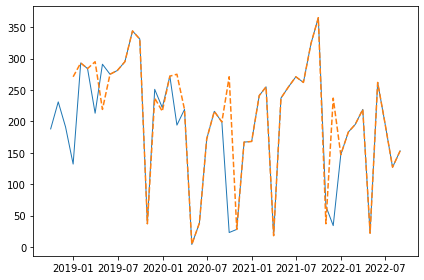

In [ ]:
column = 'MOBI LIKE 1.'

y_pred = mean_model.predict(df_train.drop(columns=column))

fig, ax = plt.subplots()
tspplot(df[[column]],ax=ax) 
ax.plot(df.iloc[time_lag::][[column]].index,y_pred,linestyle='dashed')
plt.show()


# Apply all products

In [ ]:
def apply_ml_all(df, model, time_lag=3, repeats=10):

  mse_values = {}
  predictions = {}

  for column in df:
    print('Processing... ', column)

    df_train_na = build_train_features(df, column, time_lag)

    df_train = df_train_na.dropna()

    mse, mean_model = apply_ml_to_series(df_train, column, model = model, repeats=repeats)

    mse_values[column] = mse
    predictions[column] = mean_model.predict(df_train.drop(columns=column))

  return predictions, mse_values
    



In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

predictions, mse_values = apply_ml_all(df, model=model)

Processing...  MOBI LIKE 1.
Processing...  FIORINO 1.4 FLEX
Processing...  CRONOS DRIVE 1.3
Processing...  ARGO DRIVE 1.
Processing...  PULSE IMPETUS TF2 CVT
Processing...  ARGO TREKKING 1.3
Processing...  TORO RANCH 2. D AT9
Processing...  TORO VOLCANO 2. DSAT9
Processing...  ARGO 1.
Processing...  DUCATO CHASSI L
Processing...  NOVA STRADA FREEDOM CS 1.3
Processing...  NOVA STRADA VOLCANO CD 1.3CVT
Processing...  ARGO DRIVE 1.3
Processing...  CRONOS 1.3
Processing...  TORO ULTRA 2. DS AT9
Processing...  TORO FREEDOM 2. DSAT9
Processing...  MOBI TREKKING 1.
Processing...  NOVA STRADA ENDURANCE 1.4
Processing...  TORO VOLCANO 1.3T AT6
Processing...  TORO FREEDOM 1.3T AT6
Processing...  DUCATO MAXIMULTI
Processing...  NOVA STRADA FREEDOM CD 1.3
Processing...  TORO ENDURANCE 1.3T AT6
Processing...  PULSE AUDACE 1.T CVT
Processing...  PULSE DRIVE 1.T CVT
Processing...  PULSE DRIVE 1.3 CVT
Processing...  PULSE 1.3 MT
Processing...  NOVA STRADA RANCH CD 1.3CVT


## Show a choose product model... 

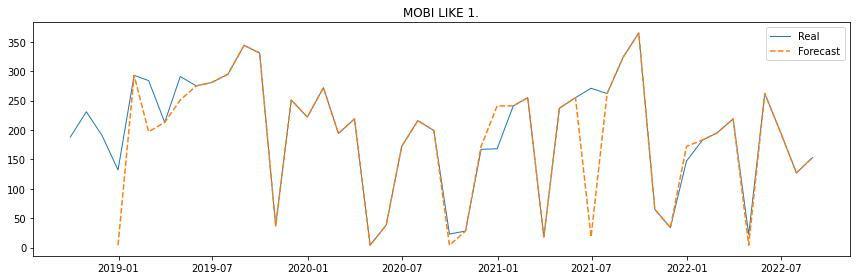

In [ ]:
column = 'MOBI LIKE 1.'
pred = predictions[column]

fig, ax = plt.subplots(figsize=(12,4))
tspplot(df[[column]],ax=ax,label='Real',title=column) 
ax.plot(df.iloc[time_lag::][[column]].index,predictions[column],linestyle='dashed',label='Forecast') 
plt.legend()

plt.show()

# MSE Table

In [ ]:
produto = []
mse_forecast = []
for key, value in mse_values.items():
  produto.append(key)
  mse_forecast.append(value)

mse_df = pd.DataFrame()
mse_df['produto'] = produto
mse_df['mse_forecast'] = mse_forecast

mse_df = mse_df.sort_values('mse_forecast').reset_index(drop=True)

display(mse_df)

,produto,mse_forecast
0,DUCATO CHASSI L,2.557883
1,DUCATO MAXIMULTI,2.724647
2,TORO FREEDOM 2. DSAT9,83.742857
3,CRONOS 1.3,107.292317
4,TORO ENDURANCE 1.3T AT6,246.733333
5,TORO ULTRA 2. DS AT9,294.783333
6,NOVA STRADA FREEDOM CS 1.3,342.740000
7,TORO RANCH 2. D AT9,438.055556
8,NOVA STRADA ENDURANCE 1.4,442.860000
9,NOVA STRADA FREEDOM CD 1.3,500.690000


# Download tables

In [ ]:
mse_df.to_csv('mse_df.csv',index=None)


In [ ]:
from google.colab import files

files.download('mse_df.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>